<a href="https://colab.research.google.com/github/JiaminJIAN/20MA573/blob/master/src/Monte%20Carlo%20for%20integral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Monte Carlo for integral**

### **Exercise 1:**

Our goal is to compute, using OMC by exact sampling

$$\alpha = \int_{0}^{1} h(x) \, d x$$

where 

$$h(x) = 100 I_{(0, 1/100)} (x) + 1 I_{(1/100, 1)} (x).$$

The exact value shall be $\alpha = 1.99$.

- Implement the Algorithm 1 for estimator $\hat{\alpha}_{N}$;

- Estimae $MSE(\hat{\alpha}_{N})$ for $N = 2^{5}, \dots, 2^{10}$ and plot log-log chart.

**Analysis:**

We write

$$\alpha = \mathbb{E}[X] = \mathbb{E}[h(Y)],$$

where $X = h(Y)$ and $Y \sim U(0, 1)$. In other words, although $X$-sampling is not directly avaliable in python, one can use $U(0, 1)$ random variable generator to produce $Y_{i}$, then compute $h(Y_{i})$ for the samle $X_{i}$.

### **Solution:**



Firstly we import the packages we need and design the function $h(x)$ and the estimator $\hat{\alpha}_{N}$.

In [0]:
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [0]:
def h(x):
  if x < 0.01 and x > 0:
    y = 100
  elif x < 1 and x > 0.01:
    y = 1
  return y

def MC_integral(N):
  s = 0
  for i in range(N):
    X = np.random.uniform(low=0, high=1)
    s = s + h(X)
  return s/N


Then we set $N = 1000000$, and we can get an estimator of the integral.

In [3]:
print("The estimation of the integral is:")
print(MC_integral(1000000))

The estimation of the integral is:
1.995247


In [0]:
estimator_list = []

def MSE_integral(N_simu):
  for i in range(N_simu):
    a = MC_integral(1000)
    estimator_list.append(a)
  return np.var(estimator_list)

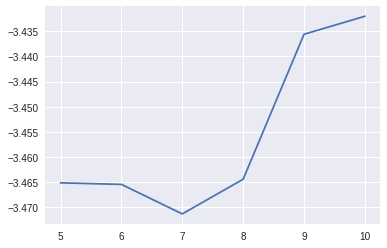

In [8]:
nn = np.arange(5, 11)
MSE_list = []

for N_simu in nn:
  mse = MSE_integral(np.power(2, N_simu))
  MSE_list.append(mse)

yy = np.log2(MSE_list)
plt.plot(nn, yy)

In [9]:
print("The MSE of each simulation is:")
print(MSE_list)

The MSE of each simulation is:
[0.0905521618566513, 0.09053261499023436, 0.09016557463010204, 0.09059742362587833, 0.09242359841829147, 0.0926529116509885]


In [10]:
import scipy.stats as ss
out = ss.linregress(nn, yy)
print('the slope between log2(MSE) and n is ' + str(-out[0]))

the slope between log2(MSE) and n is -0.0074800102259835145


We can see that when the number of simulation is big enough, we can always get the accurate estimator and the $MSE(\hat{\pi}_{N})$ is a very small number. When the number of simulation increase, we may not obtain a more accurate estimator.